In [15]:
import torch
import pandas as pd
from torchvision.transforms import ToTensor, Lambda
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision
from torchvision.io import read_image
import matplotlib.pyplot as plt
import csv
import os

%matplotlib inline

In [1]:

os.chdir('d:\PythonProjects\ComputerVisionLearning')
cur_dir = os.getcwd()

# cur_dir


In [3]:
image_path = os.path.join(cur_dir, 'images', 'StackedSetsRaw')

image_list = os.listdir(image_path)


In [4]:

# with open('main_project/vedaant/data_labels.csv', 'w', newline='') as file:
#     writer = csv.writer(file)
#     for image in image_list:
#         writer.writerow([image, 1])



In [4]:
class CustomDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = torchvision.io.image.read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        sample = (image, label)
        return sample 




In [5]:
print(cur_dir)
annotations_file = os.path.join(cur_dir, "main_project", 'vedaant', 'data_labels.csv')
img_dir = os.path.join(cur_dir, 'images', 'StackedSetsRaw')

dataset = CustomDataset(annotations_file=annotations_file, img_dir=img_dir)


d:\PythonProjects\ComputerVisionLearning


In [11]:
test = dataset.__getitem__(0)

print(dataset[0][0])

def show_image(item):
    image = item[0]
    label = item[1]
    print(f"Label: {label}")
    img = image[0].squeeze()
    plt.imshow(img, cmap='gray')

# show_image(dataset[0])

dataset_len = dataset.__len__()

train_size = int(0.8*dataset_len)
test_size = dataset_len - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])



tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)


In [13]:
print(train_dataset.__len__())
print(test_dataset.__len__())

55
14


## Preparing data for training

In [16]:
train_dataloader = DataLoader(train_dataset, batch_size=3, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=3, shuffle=True)

Feature batch shape: torch.Size([3, 1, 160, 20])
Labels batch shape: torch.Size([3])


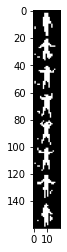

In [67]:
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')


img = train_features[0].squeeze()
plt.imshow(img, cmap='gray')
plt.show()